In [ ]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.decomposition import PCA
import math
import matplotlib.pyplot as plt

# We start loading all the audio variables

In [ ]:
#read echonest.csv
echonest=pd.read_csv("/Users/simone/Desktop/echonest.csv")


In [179]:
echonest.shape

(13129, 250)

In [ ]:
echonest.dtypes

In [ ]:
echonest.isnull().sum()

there are many na values

In [ ]:
echonest.tail()

# a little description:
- track_id: the id of the track
- audio_features_acousticness: a value in [0-1], when the track is closer to 0 it has mainly an electric sound
- audio_features_danceability: a value in [0-1], it's expressing a combination of tempo,rythm, beat strengt, so how suitable is for dancing
- audio_features_energy: a value in [0-1], when the track is closer to 1, the song has fast,loud,noisy sounds
- audio_features_instrumentalness: a value in [0-1], when the track is closer to 1, the song has the high probability that there is no vocals
- audio_features_liveness: a value in [0-1], it describes how likely the song was performed live
- audio_features_speechiness: a value in [0-1], it describes how it is exclusively speech-like the recording
- audio_features_tempo: it describes the number of beats per minute
- audio_features_valence:a value in [0-1], it describes how much the song is positive
- metadata_album_date:
- metadata_album_name
- metadata_artist_latitude
- metadata_artist_location
- metadata_artist_longitude
- metadata_artist_name
- metadata_release
- ranks_artist_discovery_rank
- ranks_artist_familiarity_rank: a value in [0-1], it is an indication of how well known the artist is 
- ranks_artist_hotttnesss_rank: a value in [0-1], it gives an indication how much popular the artist is  now
- ranks_song_currency_rank
- ranks_song_hotttnesss_rank: a value in [0-1], it gives an indication how much popular the song is now
- social_features_artist_discovery
- social_features_artist_familiarity
- social_features_artist_hotttnesss
- social_features_song_currency
- social_features_song_hotttnesss
- temporal_features_000 to temporal_features_223 

Now, we are going to drop the columns that are not needed.

In [ ]:
#i make a copy of our dataframa
e=echonest.copy()
not_dropped_columns=["audio_features_acousticness","audio_features_danceability","audio_features_energy","audio_features_instrumentalness","audio_features_liveness","audio_features_speechiness","audio_features_tempo","audio_features_valence"]
e=e[not_dropped_columns]


the next step is counting the na values after the dropping

In [ ]:
e.isnull().sum()

We use PCA to make the dataset smaller and to remove the redundancy

this choice was taken for all the datasets.
the reasons are many:
- this removes the correlated features
- it improves the algorithm performance
- it gives the possibility to choose the quantity of information to keep

However it has some disavantages:
- indenpendent variables become hard to find
- there is a limited information loss

First step is Standardization, to make that each variable  contributes equally to the analysis.
$$
  z=\frac {value - mean } {standardDeviation}\
$$

In [ ]:
normalised_columns=["audio_features_acousticness","audio_features_danceability","audio_features_energy","audio_features_instrumentalness","audio_features_liveness","audio_features_speechiness","audio_features_tempo","audio_features_valence"]
for col in normalised_columns:
    mean=e[col].mean()
    std=e[col].std()
    e[col]=(e[col]- mean)/std
e.tail()

In [ ]:
e.shape

I compute the PCA on this dataset, creating principals to get a total variance that is more than 70 %

In [ ]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(e)
x=pca.transform(e)


In [ ]:
x.shape

here we create a new dataframe and insert again the track_id

In [ ]:
e=pd.DataFrame(x)
e= e.add_suffix("_e")
e["track_id"]=echonest["track_id"]
e.tail()

# Now we load the features.csv file

In [180]:
#read features.csv
features=pd.read_csv("/Users/simone/Desktop/features.csv")

In [181]:
features.shape

(106574, 519)

In [ ]:
features.dtypes

In [ ]:
diz={}
for name in features.columns.values:
    name=name.split("_")[:-1]
    name="_".join(name)
    if name not in diz:
        diz[name]=1
    else:
        diz[name]+=1
for name,times in diz.items():
    if times>1:
        name=name+"_k"
        print("{}, with k from 1 to {}\n".format(name,times))
    else:
        print("{}\n".format(name))

In [ ]:
features.tail()

Now a list of each attribute :

- track

## Chroma features

- chroma_cens_kurtosis_k, with k from 1 to 12

- chroma_cens_max_k, with k from 1 to 12

- chroma_cens_mean_k, with k from 1 to 12

- chroma_cens_median_k, with k from 1 to 12

- chroma_cens_min_k, with k from 1 to 12

- chroma_cens_skew_k, with k from 1 to 12

- chroma_cens_std_k, with k from 1 to 12

- chroma_cqt_kurtosis_k, with k from 1 to 12

- chroma_cqt_max_k, with k from 1 to 12

- chroma_cqt_mean_k, with k from 1 to 12

- chroma_cqt_median_k, with k from 1 to 12

- chroma_cqt_min_k, with k from 1 to 12

- chroma_cqt_skew_k, with k from 1 to 12

- chroma_cqt_std_k, with k from 1 to 12

- chroma_stft_kurtosis_k, with k from 1 to 12

- chroma_stft_max_k, with k from 1 to 12

- chroma_stft_mean_k, with k from 1 to 12

- chroma_stft_median_k, with k from 1 to 12

- chroma_stft_min_k, with k from 1 to 12

- chroma_stft_skew_k, with k from 1 to 12

- chroma_stft_std_k, with k from 1 to 12

## MFCC Features

- mfcc_kurtosis_k, with k from 1 to 20

- mfcc_max_k, with k from 1 to 20

- mfcc_mean_k, with k from 1 to 20

- mfcc_median_k, with k from 1 to 20

- mfcc_min_k, with k from 1 to 20

- mfcc_skew_k, with k from 1 to 20

- mfcc_std_k, with k from 1 to 20

## RMSE Features

- rmse_kurtosis

- rmse_max

- rmse_mean

- rmse_median

- rmse_min

- rmse_skew

- rmse_std

## Spectral Features

- spectral_bandwidth_kurtosis

- spectral_bandwidth_max

- spectral_bandwidth_mean

- spectral_bandwidth_median

- spectral_bandwidth_min

- spectral_bandwidth_skew

- spectral_bandwidth_std

- spectral_centroid_kurtosis

- spectral_centroid_max

- spectral_centroid_mean

- spectral_centroid_median

- spectral_centroid_min

- spectral_centroid_skew

- spectral_centroid_std

- spectral_contrast_kurtosis_k, with k from 1 to 7

- spectral_contrast_max_k, with k from 1 to 7

- spectral_contrast_mean_k, with k from 1 to 7

- spectral_contrast_median_k, with k from 1 to 7

- spectral_contrast_min_k, with k from 1 to 7

- spectral_contrast_skew_k, with k from 1 to 7

- spectral_contrast_std_k, with k from 1 to 7

- spectral_rolloff_kurtosis

- spectral_rolloff_max

- spectral_rolloff_mean

- spectral_rolloff_median

- spectral_rolloff_min

- spectral_rolloff_skew

- spectral_rolloff_std

## Tonnetz

- tonnetz_kurtosis_k, with k from 1 to 6

- tonnetz_max_k, with k from 1 to 6

- tonnetz_mean_k, with k from 1 to 6

- tonnetz_median_k, with k from 1 to 6

- tonnetz_min_k, with k from 1 to 6

- tonnetz_skew_k, with k from 1 to 6

- tonnetz_std_k, with k from 1 to 6

## Zero Crossing Rate

- zcr_kurtosis

- zcr_max

- zcr_mean

- zcr_median

- zcr_min

- zcr_skew

- zcr_std



here we count the na values

In [ ]:
features.isnull().sum()

there aren't na value in this dataset

we do again the standardization

In [ ]:
for col in features:
    if col!="track_id":
        mean=features[col].mean()
        std=features[col].std()
        features[col]=(features[col]- mean)/std
features.tail()

In [ ]:
features.shape

In [ ]:
f=features.loc[:, features.columns != 'track_id']

we proceed with the PCA on this dataset

In [ ]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(f)
x=pca.transform(f)

In [ ]:
x.shape

In [ ]:
f=pd.DataFrame(x)
f= f.add_suffix("_f")
f["track_id"]=features["track_id"]
f.tail()

# Now we read the tracks.csv file

In [182]:
tracks=pd.read_csv("/Users/simone/Desktop/tracks.csv")
tracks.shape

(106574, 53)

In [ ]:
tracks.dtypes

In [105]:
tracks.head()

,track_id,album_comments,album_date_created,album_date_released,album_engineer,album_favorites,album_id,album_information,album_listens,album_producer,album_tags,album_title,album_tracks,album_type,artist_active_year_begin,artist_active_year_end,artist_associated_labels,artist_bio,artist_comments,artist_date_created,artist_favorites,artist_id,artist_latitude,artist_location,artist_longitude,artist_members,artist_name,artist_related_projects,artist_tags,artist_website,artist_wikipedia_page,set_split,set_subset,track_bit_rate,track_comments,track_composer,track_date_created,track_date_recorded,track_duration,track_favorites,track_genre_top,track_genres,track_genres_all,track_information,track_interest,track_language_code,track_license,track_listens,track_lyricist,track_number,track_publisher,track_tags,track_title
0,2,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:12,2008-11-26 00:00:00,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
1,3,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,medium,256000,0,NaN,2008-11-26 01:48:14,2008-11-26 00:00:00,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
2,5,0,2008-11-26 01:44:45,2009-01-05 00:00:00,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album,2006-01-01 00:00:00,NaN,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,['awol'],http://www.AzillionRecords.blogspot.com,NaN,training,small,256000,0,NaN,2008-11-26 01:48:20,2008-11-26 00:00:00,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
3,10,0,2008-11-26 01:45:08,2008-02-06 00:00:00,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album,NaN,NaN,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"['philly', 'kurt vile']",http://kurtvile.com,NaN,training,small,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26 00:00:00,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
4,20,0,2008-11-26 01:45:05,2009-01-06 00:00:00,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album,1990-01-01 00:00:00,2011-01-01 00:00:00,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"['instrumentals', 'experimental pop', 'post pu...",NaN,NaN,training,large,256000,0,NaN,2008-11-26 01:48:56,2008-01-01 00:00:00,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [174]:
pd.unique(tracks["track_genre_top"])

array(['Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)

In [ ]:
diz ={}
df=tracks[["track_genre_top","track_genres"]]
for index in range (106574) :
    row=df.iloc[index,:]
    genre=row[0]
    code=row[1]
    if code not in diz and type(genre)==str:
        diz[code]=genre
print(diz)

In [ ]:
df=tracks[["track_genre_top","track_genres"]]
print(df.shape)
for index in range (106574) :
    row=df.iloc[index,:]
    genre=row[0]
    code=row[1]
    if not type(genre)==str:
        print(code)            
        if code in diz:
            row.replace(genre,diz[code])
            print(row)

In [ ]:
diz ={}
df=tracks[["track_genre_top","track_genres_all"]]
print(df.shape)
for index in range (106574) :
    row=df.iloc[index,:]
    genre=row[0]
    code=row[1]
    if code not in diz and type(genre)==str:
        diz[code]=genre
print(diz)
    

In [173]:
pd.unique(tracks["track_genres"])

array(['[21]', '[10]', '[76, 103]', ..., '[17, 63, 1235]',
       '[42, 107, 183]', '[10, 12, 169]'], dtype=object)

In [ ]:
tracks.columns

Now a list of all the attributes:

- track_id  
- album_comments 
- album_date_created 
- album_date_released 
- album_engineer 
- album_favorites 
- album_id 
- album_information 
- album_listens 
- album_producer 
- album_tags 
- album_title 
- album_tracks 
- album_type 
- artist_active_year_begin 
- artist_active_year_end 
- artist_associated_labels 
- artist_bio 
- artist_comments 
- artist_date_created 
- artist_favorites 
- artist_id 
- artist_latitude 
- artist_location 
- artist_longitude 
- artist_members 
- artist_name 
- artist_related_projects 
- artist_tags
- artist_website 
- artist_wikipedia_page 
- set_split  
- set_subset 
- track_bit_rate 
- track_comments 
- track_composer 
- track_date_created 
- track_date_recorded 
- track_duration 
- track_favorites 
- track_genre_top 
- track_genres
- track_genres_all
- track_information
- track_interest 
- track_language_code
- track_license
- track_listens 
- track_lyricist
- track_number 
- track_publisher
- track_tags
- track_title




In [ ]:
tracks.count()

In [106]:
tracks.isnull().sum()

track_id                         0
album_comments                   0
album_date_created            3529
album_date_released          36280
album_engineer               91279
album_favorites                  0
album_id                         0
album_information            23425
album_listens                    0
album_producer               88514
album_tags                       0
album_title                   1025
album_tracks                     0
album_type                    6508
artist_active_year_begin     83863
artist_active_year_end      101199
artist_associated_labels     92303
artist_bio                   35418
artist_comments                  0
artist_date_created            856
artist_favorites                 0
artist_id                        0
artist_latitude              62030
artist_location              36364
artist_longitude             62030
artist_members               59725
artist_name                      0
artist_related_projects      93422
artist_tags         

I selected the columns according to columns that can be used with pca and columns that have few na values.

In [ ]:
t=tracks.copy()
not_dropped_columns=["track_bit_rate","track_duration" ]
t=t[not_dropped_columns]
t.head()

In [ ]:
t.isnull().sum()

In [ ]:
t.dtypes

We use PCA to make the dataset smaller and to remove the redundancy

First step is Standardization, to make that each variable  contributes equally to the analysis.
$$
  z=\frac {value - mean } {standardDeviation}\
$$

In [ ]:
cols= ["track_bit_rate","track_duration"]
for col in cols:
    mean=t[col].mean()
    std=t[col].std()
    t[col]=(t[col]- mean)/std
t.tail()

In [ ]:
pca = PCA(n_components = 0.70)
X_new = pca.fit_transform(t)
x=pca.transform(t)

In [ ]:
t=pd.DataFrame(x)
t= t.add_suffix("_t")
t["track_id"]=tracks["track_id"]
t["track_genres"]=tracks["track_genres"]
t["track_genres_all"]=tracks["track_genres_all"]
t["track_genre_top"]=tracks["track_genre_top"]
t.tail()

Here we merge all the datasets using the track_id

In [ ]:
new_df = e.merge(f, on = ["track_id"])
new_df.tail()

In [ ]:
new_df=new_df.merge(t,on=["track_id"])
new_df.tail()

In [ ]:
new_df.shape

this is the final dataset where we apply the clustering algorithm

In [ ]:
new_df.to_csv("final_dataset.csv",index=False)

Now we are going to apply k_means to this dataset

Our k_means choose randomly k points as the first centroids and then associate each point to the cluster that is the nearest.
After these steps it computes again new centroids using the mean and it redo all the distances again.
this is done until for 2 successive steps we have a difference equal to 0 between the new centroids and the old ones.

In [ ]:
def K_scratch(dataframe,k,iters):
    #it moves the keys at the end of the rows
    ids=dataframe["track_id"].copy()
    del dataframe["track_id"]
    dataframe["track_id"]=ids
    dataframe["cluster_#"]=0

    differences=[]
    
    #it takes k rows from the dataframe excluding the string columns
    centroids=dataframe.iloc[:,:-5].sample(n=k)
    first=False
    diff=1
    steps=1
    PastDistance=0
    dataframe["cluster_#"]=0
    while diff!=0 and steps<=iters:
        distanceSum=0
        steps+=1
        #it iterates on each row(point)
        for i in range(len(dataframe)):
            #it keeps the distance of each node to the k clusters
            support=np.zeros(k)
            #it iterates on each centroids
            for j in range(len(centroids)):
                #it fills with all the distances
                r=np.asarray(dataframe.iloc[i,:-5])
                c=np.asarray(centroids.iloc[j,:])
                dist = np.linalg.norm(r-c)
                support[j]=dist
            #it associates the  i point to the cluster that minimize the distance that corrisponds to the index of support
            index=np.argmin(support)
            #it measure the total distance from each point to the centroid that is the nearest
            distanceSum+=support[index]
            dataframe.loc[i,"cluster_#"]=index
            #new centroids
        differences.append(distanceSum)   
        new_centroids=dataframe.groupby(["cluster_#"],group_keys=False).mean().iloc[:,:-1]
        if first:
            v=new_centroids-centroids
            diff=np.sum(np.sum(v,axis=1))
            PastDistance=distanceSum
            centroids=new_centroids.copy()
        else:
            diff=1
            PastDistance=distanceSum
            centroids=new_centroids.copy()
            first=True
    vect=np.asarray(differences)
    return vect

In [ ]:
dataset=pd.read_csv("/Users/simone/Desktop/final_dataset.csv")

In [ ]:
%%time
vect=K_scratch(dataset,4,10)
plt.plot(vect)
plt.show()

In [ ]:
def elbow_method(dataframe):
    distanceMeasures=[]
    for k in range(2,16):
        vec=K_scratch(dataframe,k,10)
        distance=vec[-1]
        distanceMeasures.append(distance)
    plt.plot(distanceMeasures,"b-o")
    plt.show()

In [ ]:
elbow_method(dataset)

using the elbow method seems that 11 is the right number to choose 

Now we use the other chosen method: silhoutte method

In [ ]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 15

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    K_scratch(dataset,k,10)
    labels = np.asarray(dataset["cluster_#"])
    sil.append(silhouette_score(X=dataset.iloc[:,:-5],labels=labels, metric='euclidean'))
plt.plot(sil,"b-o")

Both using the elbow method and the silhoutte method we learn that the best number of  cluster is 11

## Analysing my results!

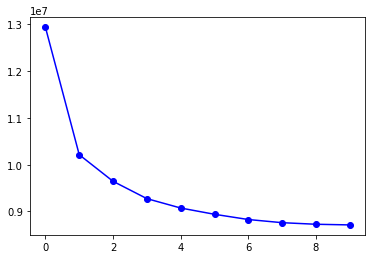

CPU times: user 3min 27s, sys: 558 ms, total: 3min 27s
Wall time: 3min 27s


In [142]:
%%time
vect=K_scratch(dataset,11,10)
plt.plot(vect,"b-o")
plt.show()

the plot is describing the inertia in comparison at the number of iterations

In [169]:
def printPivotTable(var):
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    if var == "bit":
        df["Variables"] = ["bit < 80"," 80 < bit < 130","130 < bit < 180", "bit > 180", ""]
        for name in col[1:]:
            n_cluster = int(name.split("#")[1])
            l = [0,0,0,0,0]
            list_track = echonest[dataset["cluster_#"] == n_cluster-1]
            for x in list_track.audio_features_tempo:
                if x < 80:
                    l[0] += 1
                elif 80 < x < 130:
                    l[1] += 1
                elif 130 < x < 180:
                    l[2] += 1
                elif 180 < x:
                    l[3] += 1
                
            l = [round(100*x/len(list_track.audio_features_tempo),2) for x in l]
            s = sum(l)
            l[4] = s
            l = ['{:.2f}'.format(x)+"%" for x in l]
            df[name] = l 
            
    return df 

In [170]:
printPivotTable("bit")

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,bit < 80,11.56%,7.49%,8.99%,6.17%,5.44%,11.92%,18.07%,4.80%,5.16%,4.58%,13.36%
1,80 < bit < 130,55.38%,51.83%,49.44%,51.39%,51.65%,53.79%,54.82%,49.01%,51.47%,54.08%,55.86%
2,130 < bit < 180,27.42%,34.45%,35.21%,35.09%,36.06%,28.59%,22.54%,37.75%,35.25%,31.76%,25.37%
3,bit > 180,5.65%,6.22%,6.37%,7.35%,6.78%,5.69%,4.57%,8.44%,8.11%,9.44%,5.41%
4,,100.01%,99.99%,100.01%,100.00%,99.93%,99.99%,100.00%,100.00%,99.99%,99.86%,100.00%


## Observations

boh

In [161]:
def printPivotTableDanceability():
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    
    df["Variables"] = ["25%","< 50%","< 75%", "75%> ",""]
    for name in col[1:]:
        n_cluster = int(name.split("#")[1])
        l = [0,0,0,0,0]
        list_track = echonest[dataset["cluster_#"] == n_cluster-1]
        for x in list_track.audio_features_danceability:
            if x < 0.25:
                l[0] += 1
            elif 0.25 < x < 0.50:
                l[1] += 1
            elif 0.50 < x <= 0.75:
                l[2] += 1
            elif 0.75 < x <= 1:
                l[2] += 1

        l = [round(100*x/len(list_track.audio_features_danceability),2) for x in l]
        s = sum(l)
        l[4] = s
        l = ['{:.2f}'.format(x)+"%" for x in l]
        df[name] = l 
            
    return df 

In [162]:
printPivotTableDanceability()

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,25%,16.13%,12.86%,19.85%,8.58%,11.56%,10.16%,17.18%,15.73%,8.41%,5.58%,13.42%
1,< 50%,44.89%,44.84%,44.94%,33.80%,40.77%,34.96%,52.33%,38.25%,30.97%,29.76%,44.26%
2,< 75%,38.98%,42.29%,35.21%,57.62%,47.66%,54.88%,30.49%,46.03%,60.62%,64.66%,42.32%
3,75%>,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,,100.00%,99.99%,100.00%,100.00%,99.99%,100.00%,100.00%,100.01%,100.00%,100.00%,100.00%


## Observations

boh

In [163]:
def printPivotTableLiveness():
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    
    df["Variables"] = ["25%","< 50%","< 75%", "75%> ",""]
    for name in col[1:]:
        n_cluster = int(name.split("#")[1])
        l = [0,0,0,0,0]
        list_track = echonest[dataset["cluster_#"] == n_cluster-1]
        for x in list_track.audio_features_liveness:
            if x < 0.25:
                l[0] += 1
            elif 0.25 < x < 0.50:
                l[1] += 1
            elif 0.50 < x <= 0.75:
                l[2] += 1
            elif 0.75 < x <= 1:
                l[2] += 1

        l = [round(100*x/len(list_track.audio_features_liveness),2) for x in l]
        s = sum(l)
        l[4] = s
        l = ['{:.2f}'.format(x)+"%" for x in l]
        df[name] = l 
            
    return df 

In [164]:
printPivotTableLiveness()

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,25%,83.60%,80.03%,80.90%,74.62%,76.11%,86.86%,85.40%,76.49%,68.44%,80.11%,81.64%
1,< 50%,12.10%,14.45%,10.11%,17.49%,16.96%,9.62%,10.53%,15.40%,22.12%,16.02%,13.07%
2,< 75%,4.30%,5.52%,8.99%,7.89%,6.93%,3.52%,4.07%,8.11%,9.44%,3.86%,5.30%
3,75%>,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,99.99%,100.01%


## Observations

boh

In [167]:
def printPivotTableSpeechiness():
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    
    df["Variables"] = ["25%","< 50%","< 75%", "75%> ",""]
    for name in col[1:]:
        n_cluster = int(name.split("#")[1])
        l = [0,0,0,0,0]
        list_track = echonest[dataset["cluster_#"] == n_cluster-1]
        for x in list_track.audio_features_speechiness:
            if x < 0.25:
                l[0] += 1
            elif 0.25 < x < 0.50:
                l[1] += 1
            elif 0.50 < x <= 0.75:
                l[2] += 1
            elif 0.75 < x <= 1:
                l[2] += 1

        l = [round(100*x/len(list_track.audio_features_speechiness),2) for x in l]
        s = sum(l)
        l[4] = s
        l = ['{:.2f}'.format(x)+"%" for x in l]
        df[name] = l 
            
    return df 

In [168]:
printPivotTableSpeechiness()

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,25%,94.62%,92.55%,94.38%,88.89%,90.16%,91.73%,95.73%,89.40%,84.37%,84.55%,92.58%
1,< 50%,4.30%,4.48%,4.49%,8.05%,6.78%,5.42%,3.67%,8.28%,11.80%,11.87%,3.77%
2,< 75%,1.08%,2.97%,1.12%,3.06%,3.06%,2.85%,0.60%,2.32%,3.83%,3.58%,3.65%
3,75%>,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,,100.00%,100.00%,99.99%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%


## Observations

boh

In [171]:
def printPivotTableInstrumentalness():
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    
    df["Variables"] = [" < 25%","< 50%","< 75%", "75% > ",""]
    for name in col[1:]:
        n_cluster = int(name.split("#")[1])
        l = [0,0,0,0,0]
        list_track = echonest[dataset["cluster_#"] == n_cluster-1]
        for x in list_track.audio_features_instrumentalness:
            if x < 0.25:
                l[0] += 1
            elif 0.25 < x < 0.50:
                l[1] += 1
            elif 0.50 < x <= 0.75:
                l[2] += 1
            elif 0.75 < x <= 1:
                l[2] += 1

        l = [round(100*x/len(list_track.audio_features_instrumentalness),2) for x in l]
        s = sum(l)
        l[4] = s
        l = ['{:.2f}'.format(x)+"%" for x in l]
        df[name] = l 
            
    return df 

In [172]:
printPivotTableInstrumentalness()

,Variables,Cluster #1,Cluster #2,Cluster #3,Cluster #4,Cluster #5,Cluster #6,Cluster #7,Cluster #8,Cluster #9,Cluster #10,Cluster #11
0,< 25%,13.98%,21.48%,7.87%,32.30%,27.49%,23.31%,7.05%,26.82%,26.99%,35.19%,16.48%
1,< 50%,4.30%,5.83%,1.87%,7.83%,7.43%,4.47%,1.39%,5.96%,6.49%,7.58%,3.77%
2,< 75%,81.72%,72.69%,90.26%,59.87%,65.08%,72.22%,91.56%,67.22%,66.52%,57.22%,79.75%
3,75% >,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,100.00%,99.99%,100.00%


## Observations

boh

In [ ]:
'Hip-Hop', 'Pop', nan, 'Rock', 'Experimental', 'Folk', 'Jazz',
       'Electronic', 'Spoken', 'International', 'Soul-RnB', 'Blues',
       'Country', 'Classical', 'Old-Time / Historic', 'Instrumental',
       'Easy Listening'], dtype=object)
    

In [175]:
def printPivotTableGenres():
    col = ["Variables", "Cluster #1", "Cluster #2", "Cluster #3", "Cluster #4", "Cluster #5", "Cluster #6",
           "Cluster #7", "Cluster #8", "Cluster #9", "Cluster #10", "Cluster #11"]
    df  = pd.DataFrame(columns=col, index=None)
    
    
    df["Variables"] = ["Hip-Hop","Pop","Rock","Experimental","Folk","Jazz","Electronic","Spoken","International","Soul-Rnb","Blues","Country","Classical","Old-Time / Historic",
                       "Instrumental","Easy Listening"]
                       
    for name in col[1:]:
        cont=0
        n_cluster = int(name.split("#")[1])
        l = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
        list_track = tracks[dataset["cluster_#"] == n_cluster-1]
        for x in list_track.track_genre_top:
            if x == "Hip-Hop":
                cont+=1
                l[0] += 1
            elif  x == "Pop":
                cont+=1
                l[1] += 1
            elif x == "Rock":
                cont+=1
                l[2] += 1
            elif x == "Experimental":
                cont+=1
                l[3] += 1
            elif  x == "Folk":
                cont+=1
                l[4] += 1
            elif x == "Jazz":
                cont+=1
                l[5] += 1
            elif x == "Electronic":
                cont+=1
                l[6] += 1
            elif x == "Spoken":
                cont+=1
                l[7] += 1
            elif  x == "International":
                cont+=1
                l[8] += 1
            elif x == "Soul-Rnb":
                cont+=1
                l[9] += 1
            elif x == "Blues":
                cont+=1
                l[10] += 1
            elif x == "Country":
                cont+=1
                l[11] += 1
            elif x =="Classical":
                cont+=1
                l[12] += 1
            elif  x == "Old-Time / Historic":
                cont+=1
                l[13] += 1
            elif x == "Instrumental":
                cont+=1
                l[14] += 1
            elif x == "Easy Listening":
                cont+=1
                l[15] += 1
        l = [round(100*x/cont,2) for x in l]
        s = sum(l)
        l[4] = s
        l = ['{:.2f}'.format(x)+"%" for x in l]
        df[name] = l 
            
    return df 

In [ ]:
printPivotTableGenres()